In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data_path = "C:/Users/Gary/Desktop/jptnotebook/lung_cancer.csv"
data = pd.read_csv(data_path)
print(data)

             Name  Member_ID Diagnosis  Age  Smokes  Smokes_years  \
0            Wick      91550         M   35       3           0.0   
1     Constantine     915664         M   27      20           0.0   
2        Anderson     915691         M   30       0           0.0   
3          Telles     915940         M   28       0          37.0   
4        Maradona   91594602         M   68       4           0.0   
...           ...        ...       ...  ...     ...           ...   
1293     Borgnine     926424         M   26      13           0.0   
1294     Guinness     926682         B   77      20           0.0   
1295       Heston     926954         M   75      15           0.0   
1296         Peck     927241         M   43      30           7.0   
1297      Poitier      92751         B   51      25           0.0   

      Smokes_packs_year  AreaQ  Alkhol  family history  Result  
0                   0.0      5       4               0       1  
1                   0.0      2       5   

In [24]:
data_c = data.drop(data.columns[[0, 1, -1]], axis=1, inplace=False)
print(data_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diagnosis          1298 non-null   object 
 1   Age                1298 non-null   int64  
 2   Smokes             1298 non-null   int64  
 3   Smokes_years       1298 non-null   float64
 4   Smokes_packs_year  1298 non-null   float64
 5   AreaQ              1298 non-null   int64  
 6   Alkhol             1298 non-null   int64  
 7   family history     1298 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 81.2+ KB
None


In [25]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['Diagnosis'].value_counts())
print("Diagnosis:%d, malignant:%d benign:%d"%(diagnosis_all,diagnosis_categories[0],diagnosis_categories[1]))

Diagnosis:1298, malignant:1034 benign:264


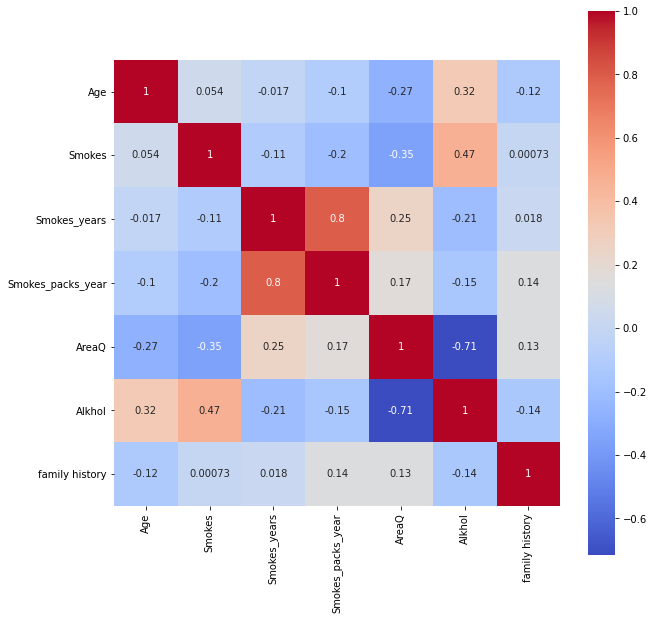

In [28]:
features_mean= list(data_c.columns[1:])
plt.figure(figsize=(10,10))
sns.heatmap(data_c[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

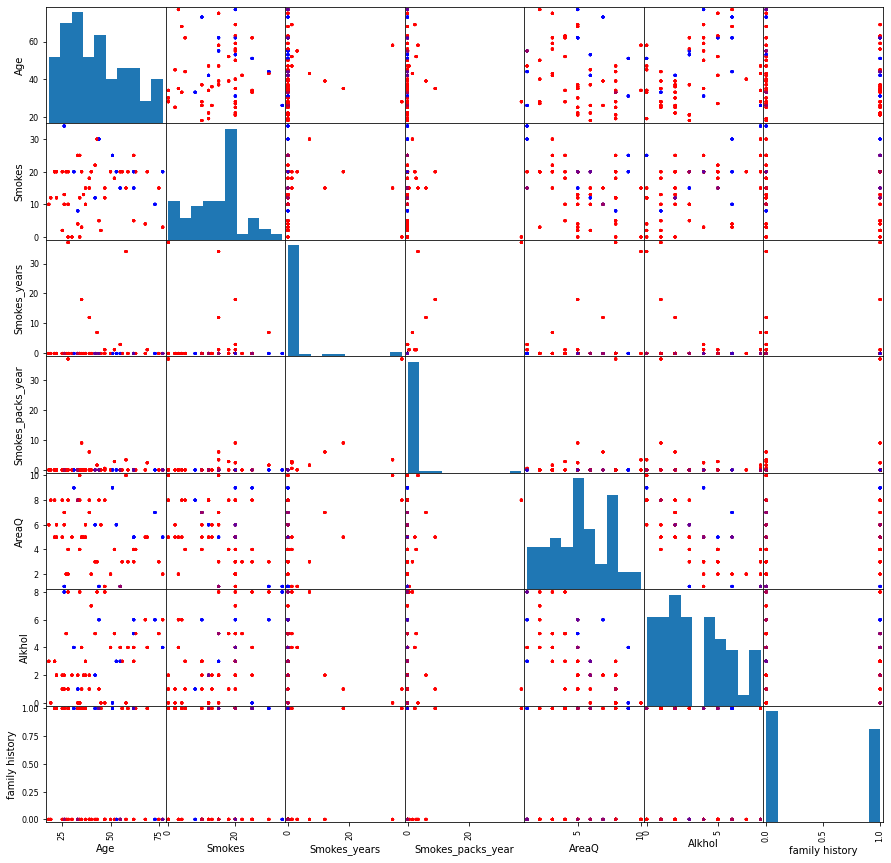

In [29]:
color_dic = {'M':'red', 'B':'blue'}
colors = data_c['Diagnosis'].map(lambda x: color_dic.get(x))

sm = pd.plotting.scatter_matrix(data_c[features_mean], c=colors, alpha=0.4, figsize=((15,15)));

plt.show()

C:\Users\Gary\anaconda3\envs\py37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gary\anaconda3\envs\py37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gary\anaconda3\envs\py37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

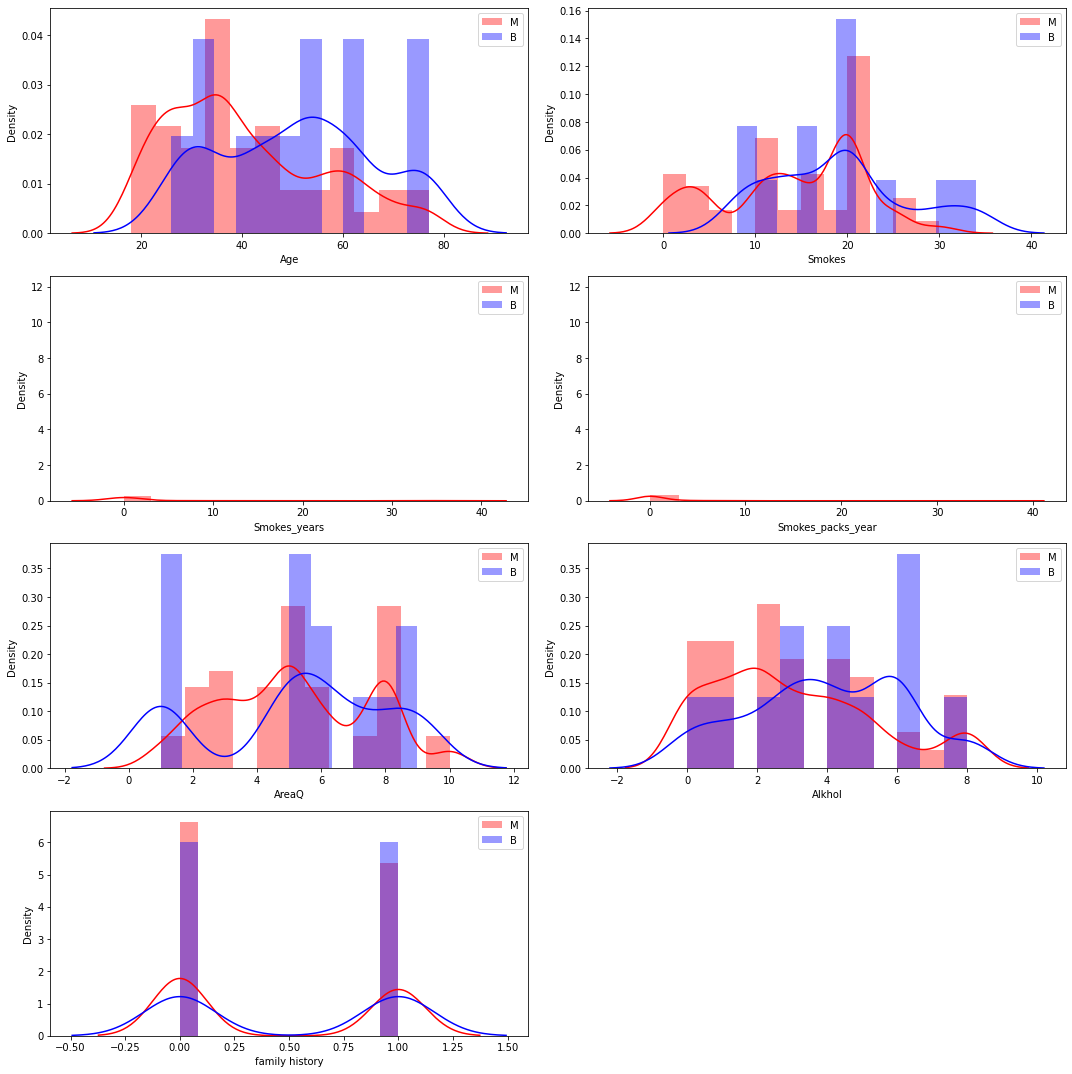

In [34]:
bins = 12
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = 4
    
    plt.subplot(rows, 2, i+1)
    
    sns.distplot(data_c[data_c['Diagnosis']=='M'][feature], bins=bins, color='red', label='M');
    sns.distplot(data_c[data_c['Diagnosis']=='B'][feature], bins=bins, color='blue', label='B');
    
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

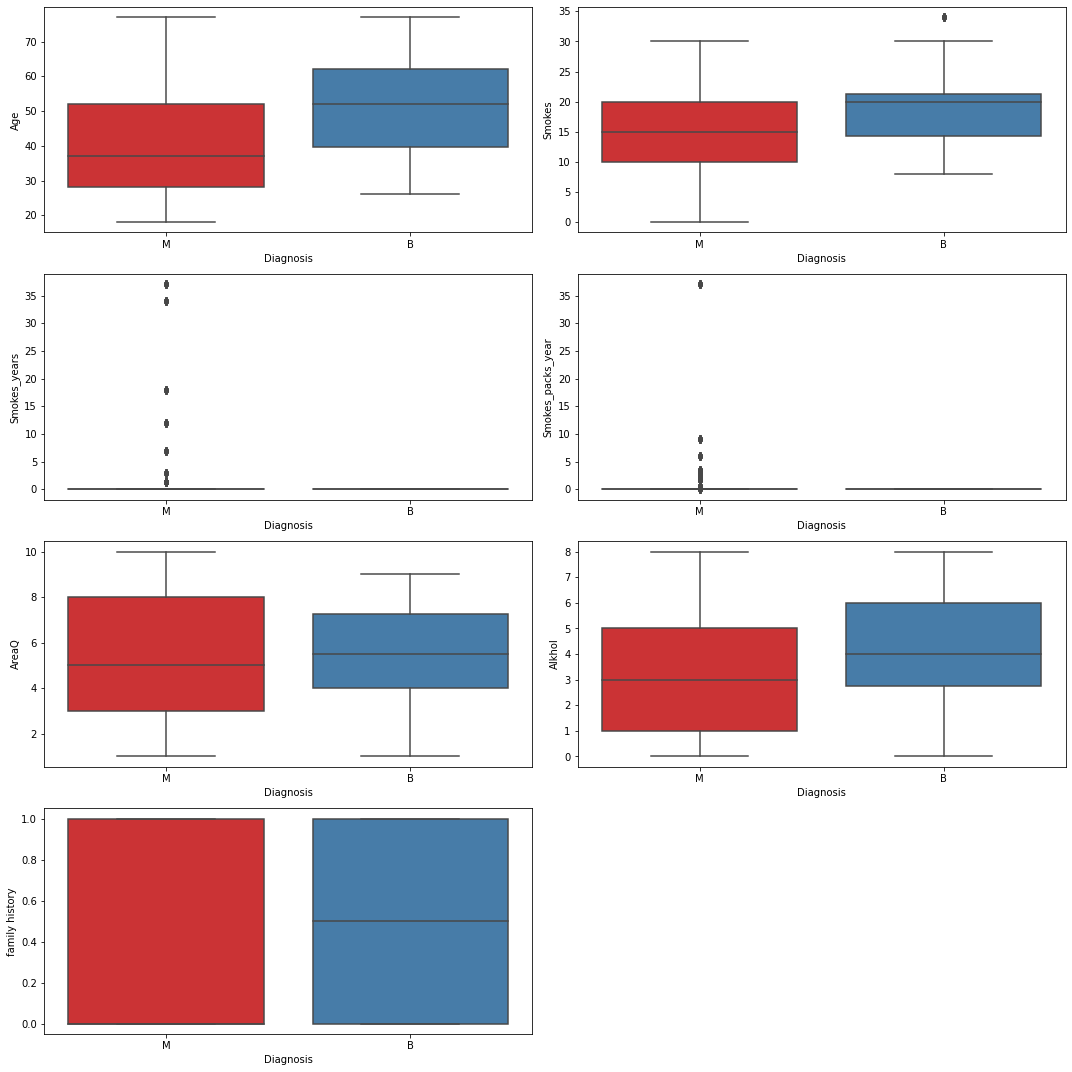

In [35]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(features_mean):
    rows = 4
    
    plt.subplot(rows, 2, i+1)
    
    sns.boxplot(x='Diagnosis', y=feature, data=data_c, palette="Set1")

plt.tight_layout()
plt.show()